In [1]:
import sys
import numpy as np

sys.path.insert(0, "/usr/src/code/src")

from pre_process_code.imputation import *
from plots import *
from stats import *
from aeon.datasets import load_from_tsfile
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    roc_auc_score,
    balanced_accuracy_score,
)


In [20]:
base_path = pathlib.Path("/usr/src/code/data/outputs")
datasets = [
    "ERing",
    "Epilepsy",
    "Heartbeat",
    "UWaveGestureLibrary",
    "ArticularyWordRecognition",
    "EthanolConcentration",
    "Libras",
    "AsphaltPavementTypeCoordinates",
    "FingerMovements",
    "Handwriting",
]

models = [
    # "TSClassifier",
    # "RidgeClassifier",
    "CanonicalIntervalForest",
    # "HIVECOTEV2",
    # "ResNetClassifier",
]

pmisses = [0, 20, 40, 60, 70, 80, 90]

results, model_mean, pmiss_result = calculate_metrics(
    accuracy_score,
    base_path,
    datasets,
    models,
    pmisses,
    #func_params={"average": "macro"},
)


In [23]:
base_path = pathlib.Path("/usr/src/code/data/outputs/time_encoding")
results2, model_mean2, pmiss_result2 = calculate_metrics(
    f1_score,
    base_path,
    datasets,
    models,
    pmisses,
    func_params={"average": "macro"},
)
model_mean["CIFEnc"] = model_mean2["CanonicalIntervalForest"]

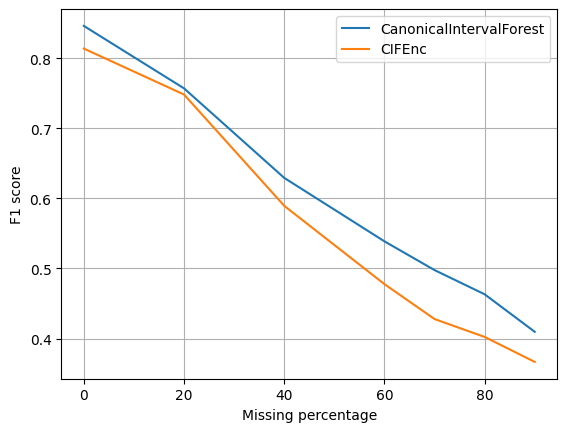

In [24]:
plot_metric(model_mean, metric="F1 score")
